<a href="https://colab.research.google.com/github/enzomaeda1/Computacao-Paralela/blob/main/A3_GeneticAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Algoritmos Genéticos**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '1115665, Adriana Fujita' #@param {type:"string"}
Aluno2 = '1115677, Daniel Henrique' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



In [ ]:
#@title **Escolha a opção de Exercício Selecionado**
Exercicio_selecionado = "Exercício A. Otimização multi-objetivo" #@param ["Exercício A. Otimização multi-objetivo", "Exercício B. Forca"]




# **Resumo**

*Apresente um parágrafo resumindo o que é feito neste trabalho*.

# **Descrição da Solução**

*Discuta aqui os principais aspectos da solução desenvolvida*.

- Para a opção *Exercício A. Otimização multi-objetivo*, isso envolve descrever o cenário fictício do problema de otimização e são construídas as funções objetivo.

- Para a opção *Exercício B. Força*, isso envolve descrever resumidamente em tópicos como é construído o seu algoritmo genético para cada uma das etapas (representação das soluções em genes, função de fitness, crossover, mutação e seleção), ou, no caso de empregar o PyGDA, descrever a modelagem empregada.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



In [30]:
!pip install pygad

Geração: 1
Melhor Fitness: 7.436042347005825e-05
Geração: 2
Melhor Fitness: 0.0001062137616543217
Geração: 3
Melhor Fitness: 0.00010924514019956045
Geração: 4
Melhor Fitness: 0.02702530367004835
Geração: 5
Melhor Fitness: 0.02702530367004835
Geração: 6
Melhor Fitness: 0.02702530367004835
Geração: 7
Melhor Fitness: 0.02702530367004835
Geração: 8
Melhor Fitness: 0.02702530367004835
Geração: 9
Melhor Fitness: 0.02702530367004835
Geração: 10
Melhor Fitness: 0.02702530367004835
Geração: 11
Melhor Fitness: 0.02702530367004835
Geração: 12
Melhor Fitness: 0.02702530367004835
Geração: 13
Melhor Fitness: 0.03818793004542052
Geração: 14
Melhor Fitness: 0.03818793004542052
Geração: 15
Melhor Fitness: 0.03818793004542052
Geração: 16
Melhor Fitness: 0.03818793004542052
Geração: 17
Melhor Fitness: 0.03818793004542052
Geração: 18
Melhor Fitness: 0.03818793004542052
Geração: 19
Melhor Fitness: 0.03818793004542052
Geração: 20
Melhor Fitness: 0.05408811772560908
Geração: 21
Melhor Fitness: 0.054088117725

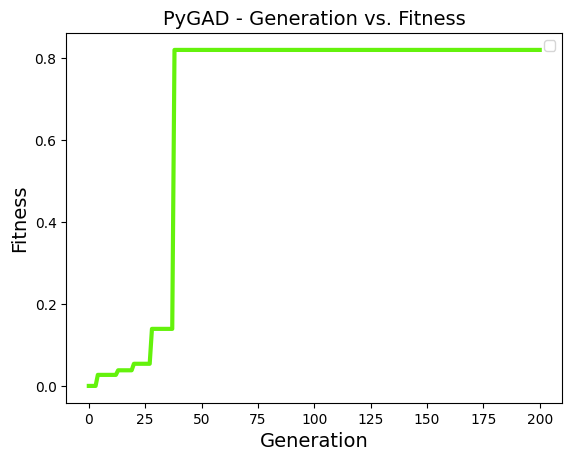

Melhores parâmetros encontrados: [-0.03036204 -2.4544835   2.42514965  0.99265065  4.68472488]
Fitness da melhor solução: 0.8195569151087692
Produção esperada com os melhores parâmetros: 100001.22017051166
Best fitness value reached after 38 generations.


In [39]:
# Seus Códigos aqui intercalados de células de texto com comentários

import pygad
import numpy as np

# Salario dos funcionarios
fatores = {
    "salario1": 1000,
    "salario2": 2000,
    "salario3": 3000,
    "salario4": 4000,
    "salario5": 10000
}

# Lista de valores dos fatores
function_inputs = np.array(list(fatores.values()))
# Objetivo desejado (exemplo: Orçamento maximo)
desired_output = 100000  # Arbitrário, pode ser ajustado conforme o caso real

def fitness_func(ga_instance, solution, solution_idx):
    output = np.sum(solution * function_inputs)
    fitness = 1.0 / (np.abs(output - desired_output) + 0.000001)  # Evita divisão por zero
    return fitness

num_generations = 200  # Número de gerações
num_parents_mating = 10  # Quantidade de pais selecionados

sol_per_pop = 20  # Tamanho da população
num_genes = len(function_inputs)

def on_generation(ga_instance):
    print(f"Geração: {ga_instance.generations_completed}")
    print(f"Melhor Fitness: {ga_instance.best_solution()[1]}")

# Configuração do Algoritmo Genético
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    fitness_func=fitness_func,
    on_generation=on_generation
)

# Executa o algoritmo
ga_instance.run()
ga_instance.plot_fitness()

# Exibe os melhores resultados
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Melhores parâmetros encontrados: {solution}")
print(f"Fitness da melhor solução: {solution_fitness}")

predicted_output = np.sum(solution * function_inputs)
print(f"Produção esperada com os melhores parâmetros: {predicted_output}")


if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")


# **Resultados (Testes)**

*Faça aqui no mínimo 4 simulações para diferentes configuraçõoes do seu problema, que mostrem a efetividade da sua solução. Você pode começar com problemas menores e crescer a complexidade a medida que avança nos problemas. Apresente a solução e o gráfico de convergência da solução ao longo das gerações. Comente em células de texto explicativas os testes e os seus resultados.*



In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas empregadas em formato ABNT.

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Descricao_solucao = 7 #@param {type:"slider", min:0, max:10, step:1}

Implementacao = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Resumo + Descricao_solucao + Implementacao + Resultados + Referencias + Geral

nota = nota / 6

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
